# Project 1

**Analyze the data and answer the following questions:**

1- Which year did the most helicopter prison break attempts occur?

1- Which country do the most attempted helicopter prison breaks occur?

## Import Modules

In [2]:
import pandas as pd
import re
import matplotlib.pyplot as plt
from IPython.display import display, HTML

## Collect Data

The `pd.read_html` function is used to extract data from the second table at the specified url.

Next, we use `dt.to_numpy().tolist()` to convert the pandas dataframe to a list of lists and assign to the variable `data`.

In [3]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"

df = pd.read_html(url)[1]
lol = df.to_numpy().tolist()
data = lol

## Examine the Data
Construct a loop to print the first three rows of data.

In [4]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro', "Joel David Kaplan was a New York businessman who had been arrested for murder in 1962 in Mexico City and was incarcerated at the Santa Martha Acatitla prison in the Iztapalapa borough of Mexico City. Joel's sister, Judy Kaplan, arranged the means to help Kaplan escape, and on August 19, 1971, a helicopter landed in the prison yard. The guards mistakenly thought this was an official visit. In two minutes, Kaplan and his cellmate Carlos Antonio Contreras, a Venezuelan counterfeiter, were able to board the craft and were piloted away, before any shots were fired.[9] Both men were flown to Texas and then different planes flew Kaplan to California and Contreras to Guatemala.[3] The Mexican government never initiated extradition proceedings against Kaplan.[9] The escape is told in a book, The 10-Second Jailbreak: The Helicopter Escape of Joel David Kaplan.[4] It also inspired t

The last element of each row contains a detailed description of the attempted escape. To simplify the data, use a loop to eliminate the description. Print the first three rows to verify the results.

In [5]:
# Use a loop to slice off the last element from each row
# Assign the result to the corresponding index in the `data` list

index = 0

for row in data:
    data[index] = row[:-1]
    index += 1

In [6]:
# Examine the first three rows of data
print(data[:3])

[['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], ['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], ['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


# Date Extraction

Define a function to extract the year from the first element in a list. Use a regular expression to find and return four consecutive digits from the `date_string`.

Use a loop to replace the first element of each row with the result from`fetch_year` function.

Print the first three rows to verify the results.

In [7]:
# Define a function to extract the year from the first element

def fetch_year(date_string):
    return int(re.findall("\d{4}", date_string)[0])

In [8]:
# Use a loop to appy the fetch_year function

for row in data:
    row[0] = fetch_year(row[0])

print(data[:3])

[[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro'], [1973, 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"], [1978, 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']]


## Append a List

Compile a list of each year an escape was attempted. Determine the date range covered by the data set.

In [9]:
# Use a loop to append the year from each row to a list

years = []

for row in data:
    year = row[0]
    years.append(year)

print(years)

[1971, 1973, 1978, 1981, 1981, 1983, 1985, 1985, 1986, 1986, 1986, 1987, 1988, 1989, 1989, 1990, 1991, 1992, 1992, 1993, 1996, 1997, 1999, 2000, 2000, 2001, 2001, 2001, 2002, 2002, 2003, 2005, 2005, 2006, 2007, 2007, 2007, 2009, 2009, 2009, 2010, 2012, 2013, 2013, 2014, 2016, 2018, 2020]


In [10]:
# Determine the date range of the data set

min_year = min(years)
max_year = max(years)
print(min_year,"-",max_year)

1971 - 2020


## Frequency Table

In [11]:
freq_table = {}

for row in data:
    y = row[0]
    if y in freq_table:
        freq_table[y] += 1
    else:
        freq_table[y] = 1

In [12]:
print(freq_table)

{1971: 1, 1973: 1, 1978: 1, 1981: 2, 1983: 1, 1985: 2, 1986: 3, 1987: 1, 1988: 1, 1989: 2, 1990: 1, 1991: 1, 1992: 2, 1993: 1, 1996: 1, 1997: 1, 1999: 1, 2000: 2, 2001: 3, 2002: 2, 2003: 1, 2005: 2, 2006: 1, 2007: 3, 2009: 3, 2010: 1, 2012: 1, 2013: 2, 2014: 1, 2016: 1, 2018: 1, 2020: 1}


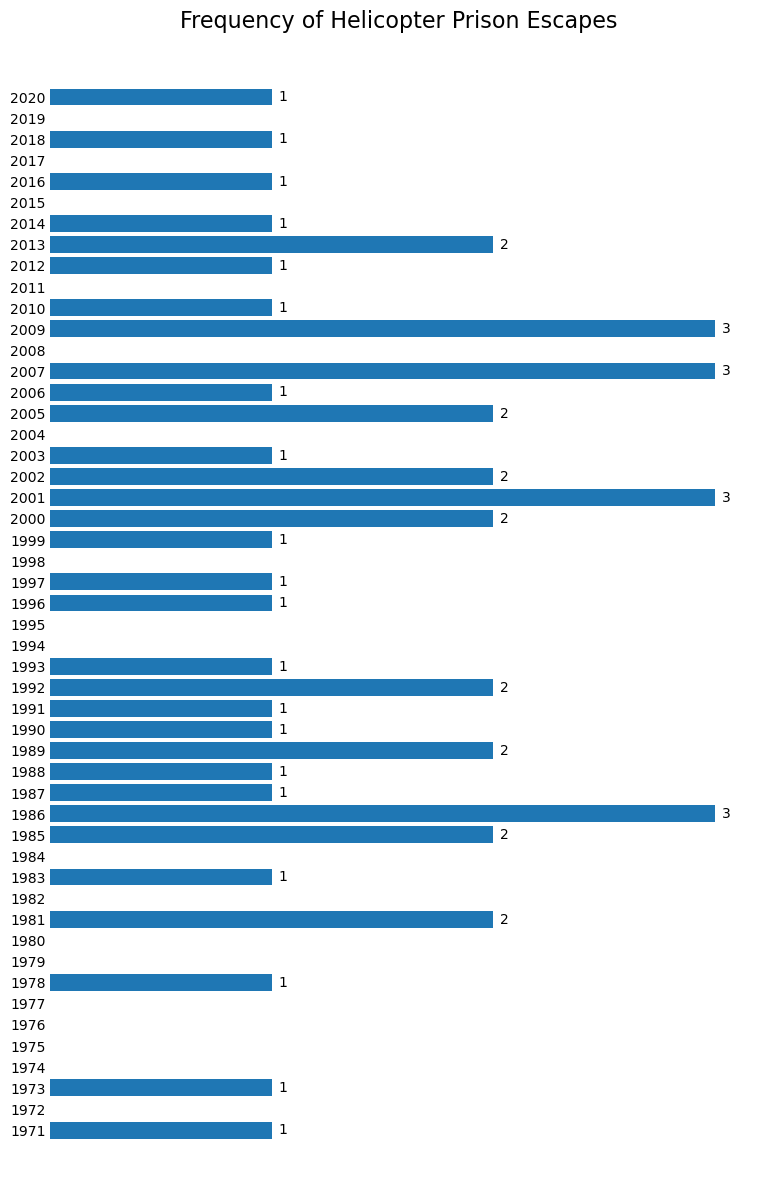

In [27]:
year = list(freq_table.keys())
values = list(freq_table.values())

fig = plt.figure(figsize=(9,15))
plt.barh(year, values)
plt.title('Frequency of Helicopter Prison Escapes', size = 16)
ytix=range(min_year,max_year+1)
plt.yticks(ytix)
spines = ['top', 'right', 'bottom', 'left']
ax = plt.gca()
for spine in spines:
    ax.spines[spine].set_visible(False)
ax.tick_params(axis='y',length=0)
ax.tick_params(axis='x',length=0, labelbottom=False)

# Create value labels on horizontal bars
rectangles = ax.patches
for rectangle in rectangles:
    x_value = rectangle.get_width()
    y_value = rectangle.get_y() + rectangle.get_height() / 2
    space = 5
    ha = 'left'
    label = "{}".format(x_value)
    if x_value > 0:
        plt.annotate(
             label,
             (x_value, y_value),
             xytext=(space, 0),
            textcoords="offset points",
            va='center',
            ha=ha)
plt.show()